# Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining


# 1.Elon-musk tweets 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import spacy
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
Elon_musk = pd.read_csv('Elon_musk.csv', encoding='cp1252',error_bad_lines = False)
Elon_musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
Elon_musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
Elon_musk.shape

(1999, 2)

In [5]:
Elon_musk.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [6]:
Elon_musk.drop(['Unnamed: 0'], inplace= True, axis= 1)
Elon_musk

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


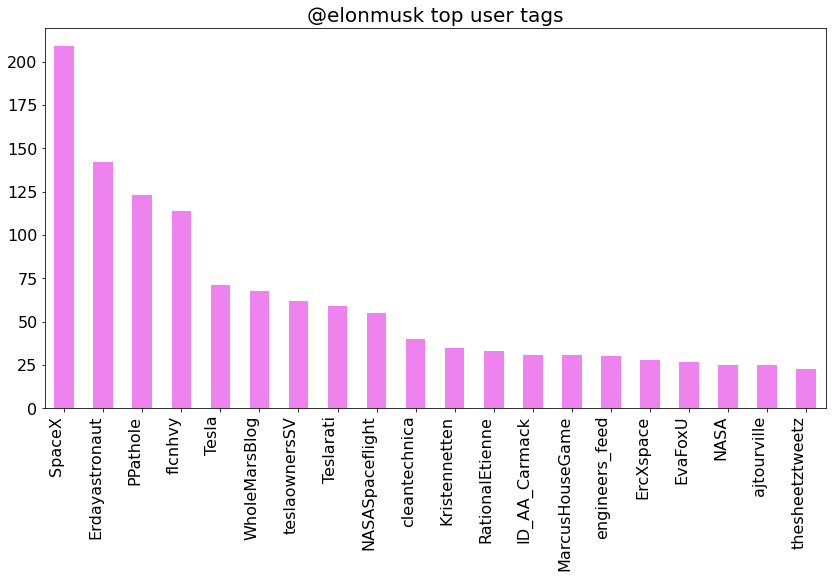

In [7]:
#Data Exploration
import itertools

c = list(itertools.chain(*Elon_musk.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='violet')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

In [8]:
#Cleaning the text by removing irrelevant information
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

# Clean The Text
Elon_musk["Text"] = Elon_musk["Text"].apply(clean_text)
Elon_musk.head()

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [9]:
#Word Frequency of top 20
freq = pd.Series(' '.join(Elon_musk['Text']).split()).value_counts()[:20] 
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
dtype: int64

In [10]:
#now we are removing Stopwords
from nltk.corpus import stopwords

stop = stopwords.words('english')
Elon_musk['Text'] = Elon_musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [11]:
#Word Frequency of top 20
freq_stp = pd.Series(' '.join(Elon_musk['Text']).split()).value_counts()[:20] 
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
cleantechnica       40
dtype: int64

FEATURE EXTRACTION

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(Elon_musk['Text'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(10)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


TFIDF Vectorizer 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create an instance of TfidfVectorizer with n-grams and maximum features
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) 
doc_vec = vectorizer.fit_transform(Elon_musk["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#N-gram
#Bi-gram

def get_top_n2_words(corpus, n=None):

#for tri-gram, put ngram_range=(3,3)    
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) 
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
#top 200
top_words = get_top_n2_words(Elon_musk["Text"], n=200) 
top_df = pd.DataFrame(top_words)
top_df.columns = ["Bi-gram", "Freq"]
top_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


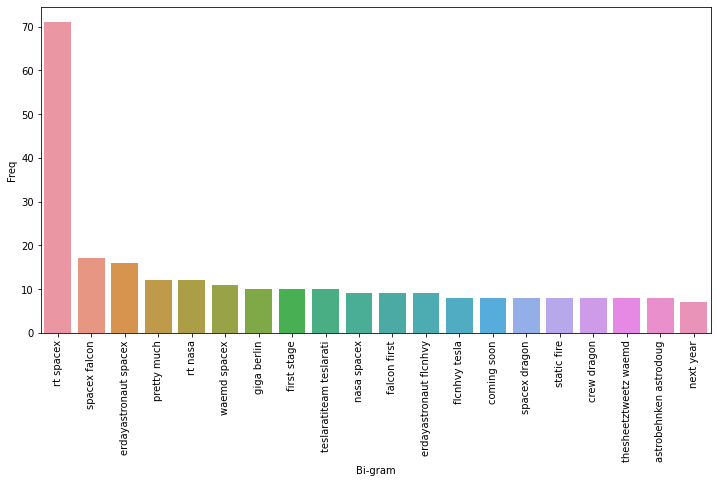

In [16]:
#Bi-gram plot
top20_bigram = top_df.iloc[0:20,:]
fig = plt.figure(figsize = (12, 6))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [17]:
#Tri-gram

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
top1_words = get_top_n3_words(Elon_musk["Text"], n=200)
top1_df = pd.DataFrame(top1_words)
top1_df.columns = ["Tri-gram", "Freq"]
top1_df.head(10)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


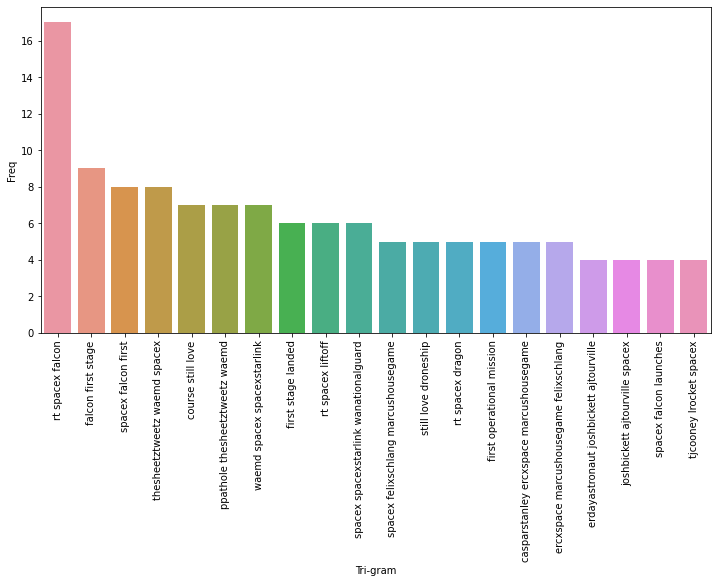

In [19]:
#Tri-gram plot
top20_trigram = top1_df.iloc[0:20,:]
fig = plt.figure(figsize = (12, 6))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

WORDCLOUD

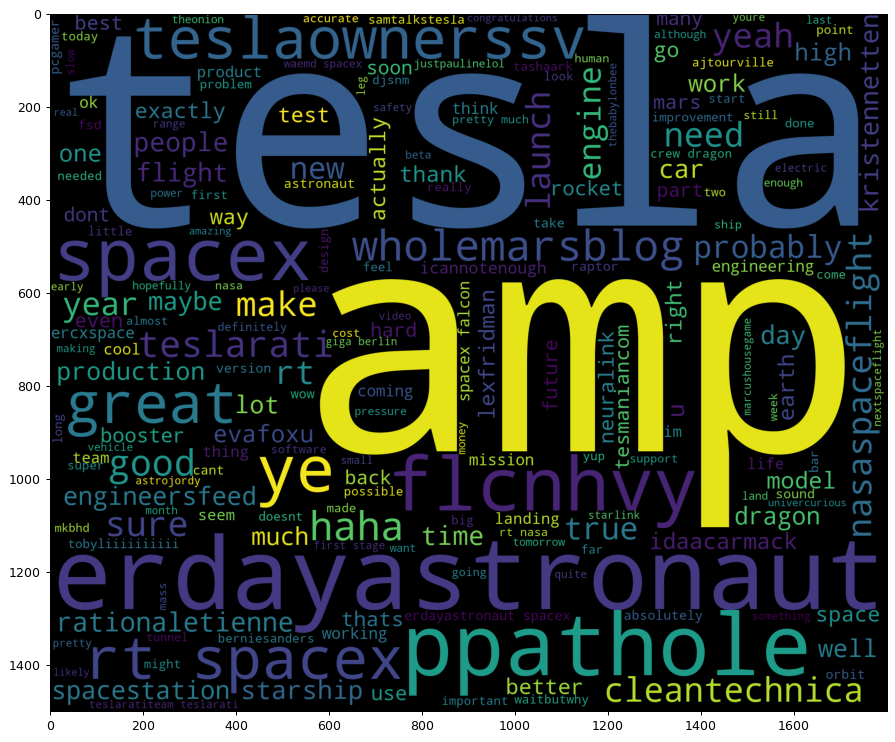

In [20]:
string_Total = " ".join(Elon_musk["Text"])

from wordcloud import WordCloud

plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

SENTIMENT ANALYSIS

In [21]:
#Subjectivity and Polarity
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
Elon_musk[["subjectivity", "polarity"]] = Elon_musk.apply(sentiment_analysis, axis=1)
Elon_musk.head(10)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


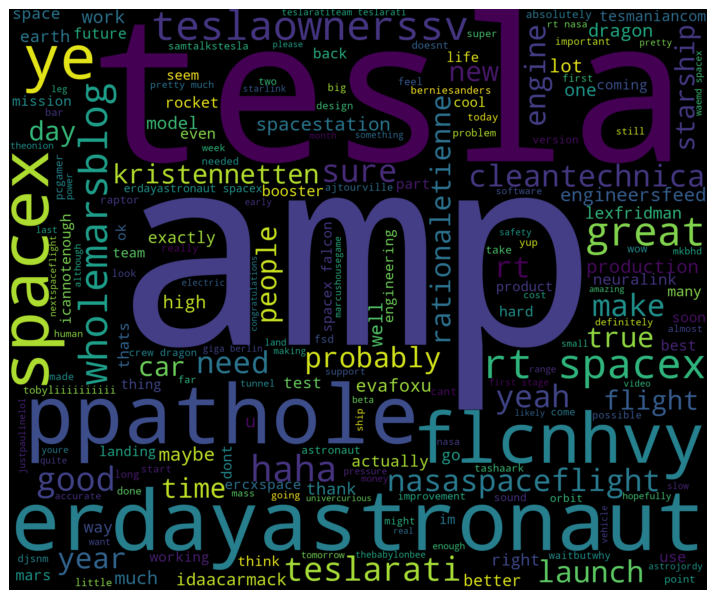

In [22]:
#wordcloud making

allwords = " ".join([twts for twts in Elon_musk["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(10,10), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [23]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [24]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
Elon_musk["analysis"] = Elon_musk["polarity"].apply(analysis)

In [25]:
positive_tweets = Elon_musk[Elon_musk['analysis'] == 'Positive']
negative_tweets = Elon_musk[Elon_musk['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


Data Visualizations

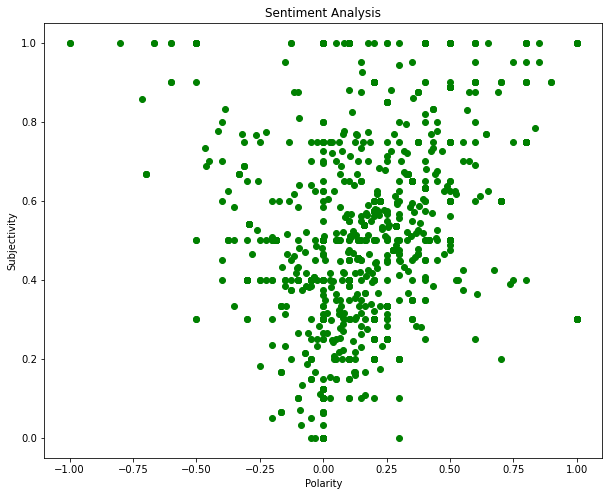

In [26]:
plt.figure(figsize=(10, 8))

for i in range(0, Elon_musk.shape[0]):
    plt.scatter(Elon_musk["polarity"][i], Elon_musk["subjectivity"][i], color = "green")

plt.title("Sentiment Analysis") 
plt.xlabel("Polarity") 
plt.ylabel("Subjectivity") 
plt.show() 

In [27]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

# 2. Perform sentimental analysis:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [28]:
import codecs
import requests

from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
#webscraping
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
response = requests.get('https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/dp/B0BT9FF5FL/ref=sr_1_10?keywords=s23&s=electronics&sr=1-10', headers=headers)

In [30]:
#looping
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [31]:
def get_soup(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup

for x in tqdm_notebook(range(160)):
    url = f'https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/dp/B0BT9FF5FL/ref=sr_1_10?keywords=s23&s=electronics&sr=1-10={x}'
    soup = get_soup(url)
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [32]:
#Save results to a Dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df.to_csv('reviews.csv', index=False)
df

,Title,Rating,Review,Review_Date
0,Premium experience is what you pay for,5.0,I am already using a s23 and bought this one b...,Reviewed in India on 11 March 2023
1,Awesome beast 🔥,5.0,Beast 🔥\nRead more,Reviewed in India on 14 March 2023
2,Best phone in 2023 the beast,5.0,Best phone\nRead more,Reviewed in India on 12 March 2023
3,You can also try xiaomi 13 pro because now his...,3.0,It's ui like a cartoon I didn't like this and ...,Reviewed in India on 9 March 2023
4,Best smart phone till date,5.0,Upgraded from my galaxy note 9 and I am liking...,Reviewed in India on 8 March 2023
...,...,...,...,...
59,You can also try xiaomi 13 pro because now his...,3.0,It's ui like a cartoon I didn't like this and ...,Reviewed in India on 9 March 2023
60,Best smart phone till date,5.0,Upgraded from my galaxy note 9 and I am liking...,Reviewed in India on 8 March 2023
61,Best Android phone ever,5.0,+ unmatched S-Pen that is useful+ Fantastic ca...,Reviewed in India on 7 March 2023
62,First Samsung Phone and i am disappointed,2.0,I really don't know why it exists for a huge p...,Reviewed in India on 13 March 2023


In [33]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)
df.head(50)

,Title,Rating,Review,Review_Date
0,Premium experience is what you pay for,5.0,I am already using a s23 and bought this one b...,11 March 2023
1,Awesome beast 🔥,5.0,Beast 🔥\nRead more,14 March 2023
2,Best phone in 2023 the beast,5.0,Best phone\nRead more,12 March 2023
3,You can also try xiaomi 13 pro because now his...,3.0,It's ui like a cartoon I didn't like this and ...,9 March 2023
4,Best smart phone till date,5.0,Upgraded from my galaxy note 9 and I am liking...,8 March 2023
5,Best Android phone ever,5.0,+ unmatched S-Pen that is useful+ Fantastic ca...,7 March 2023
6,First Samsung Phone and i am disappointed,2.0,I really don't know why it exists for a huge p...,13 March 2023
7,Excellent,5.0,Excellent\nRead more,9 March 2023
8,Premium experience is what you pay for,5.0,I am already using a s23 and bought this one b...,11 March 2023
9,Awesome beast 🔥,5.0,Beast 🔥\nRead more,14 March 2023


In [34]:
#loading reviews
reviews = pd.read_csv('reviews.csv')
reviews

,Title,Rating,Review,Review_Date
0,Premium experience is what you pay for,5.0,I am already using a s23 and bought this one b...,Reviewed in India on 11 March 2023
1,Awesome beast 🔥,5.0,Beast 🔥\nRead more,Reviewed in India on 14 March 2023
2,Best phone in 2023 the beast,5.0,Best phone\nRead more,Reviewed in India on 12 March 2023
3,You can also try xiaomi 13 pro because now his...,3.0,It's ui like a cartoon I didn't like this and ...,Reviewed in India on 9 March 2023
4,Best smart phone till date,5.0,Upgraded from my galaxy note 9 and I am liking...,Reviewed in India on 8 March 2023
...,...,...,...,...
59,You can also try xiaomi 13 pro because now his...,3.0,It's ui like a cartoon I didn't like this and ...,Reviewed in India on 9 March 2023
60,Best smart phone till date,5.0,Upgraded from my galaxy note 9 and I am liking...,Reviewed in India on 8 March 2023
61,Best Android phone ever,5.0,+ unmatched S-Pen that is useful+ Fantastic ca...,Reviewed in India on 7 March 2023
62,First Samsung Phone and i am disappointed,2.0,I really don't know why it exists for a huge p...,Reviewed in India on 13 March 2023


In [35]:
reviews.Rating.describe()

count    64.000000
mean      4.375000
std       1.119807
min       2.000000
25%       4.500000
50%       5.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [36]:
reviews.corr()

,Rating
Rating,1.0


In [37]:
reviews.shape

(64, 4)

In [38]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [39]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        64 non-null     object 
 1   Rating       64 non-null     float64
 2   Review       64 non-null     object 
 3   Review_Date  64 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.1+ KB


In [40]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head(10)

,Title,Rating,Review,Review_Date
0,Premium experience is what you pay for,5.0,I am already using a s23 and bought this one b...,Reviewed in India on 11 March 2023
1,Awesome beast 🔥,5.0,Beast 🔥\nRead more,Reviewed in India on 14 March 2023
2,Best phone in 2023 the beast,5.0,Best phone\nRead more,Reviewed in India on 12 March 2023
3,You can also try xiaomi 13 pro because now his...,3.0,It's ui like a cartoon I didn't like this and ...,Reviewed in India on 9 March 2023
4,Best smart phone till date,5.0,Upgraded from my galaxy note 9 and I am liking...,Reviewed in India on 8 March 2023
5,Best Android phone ever,5.0,+ unmatched S-Pen that is useful+ Fantastic ca...,Reviewed in India on 7 March 2023
6,First Samsung Phone and i am disappointed,2.0,I really don't know why it exists for a huge p...,Reviewed in India on 13 March 2023
7,Excellent,5.0,Excellent\nRead more,Reviewed in India on 9 March 2023
8,Premium experience is what you pay for,5.0,I am already using a s23 and bought this one b...,Reviewed in India on 11 March 2023
9,Awesome beast 🔥,5.0,Beast 🔥\nRead more,Reviewed in India on 14 March 2023


DATA VISUALIZATION

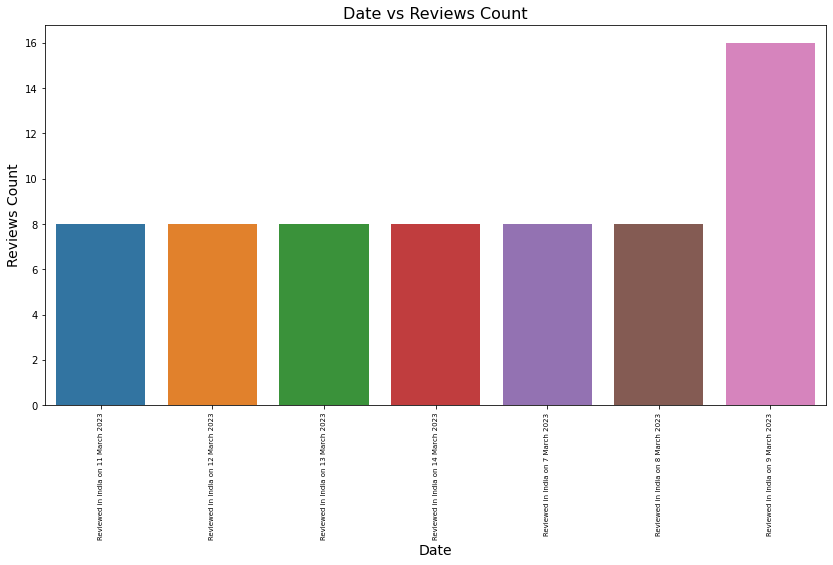

In [41]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(14,7))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

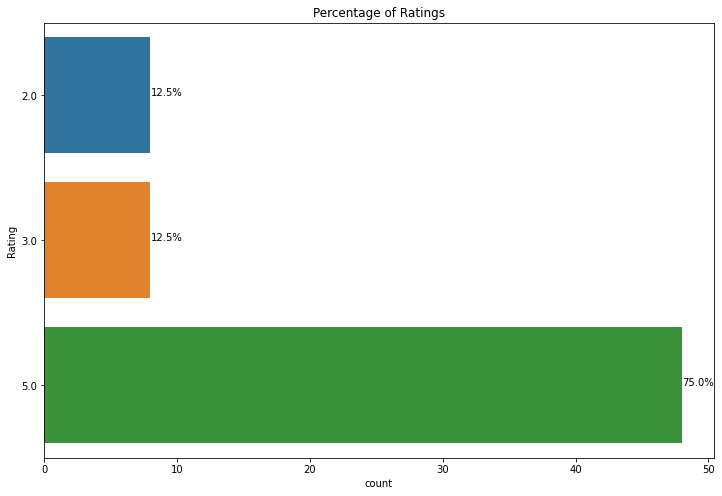

In [42]:
#pecentage of ratings
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [43]:
#BasicText Preprocessing for Sentiment Analysis
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I am already using a s and bought this one bec...
1                                   Least 🔥\nHead more
2                                West phone\nHead more
3    It's i like a cartoon I didn't like this and a...
4    Degraded from my galaxy note 9 and I am liking...
Name: Review, dtype: object

In [44]:
S23_ultra_review = reviews[['Review']]
S23_ultra_review

,Review
0,I am already using a s23 and bought this one b...
1,Beast 🔥\nRead more
2,Best phone\nRead more
3,It's ui like a cartoon I didn't like this and ...
4,Upgraded from my galaxy note 9 and I am liking...
...,...
59,It's ui like a cartoon I didn't like this and ...
60,Upgraded from my galaxy note 9 and I am liking...
61,+ unmatched S-Pen that is useful+ Fantastic ca...
62,I really don't know why it exists for a huge p...


In [45]:
#now reset index
S23_ultra_review.reset_index(drop=True, inplace=True)
stop_words = stopwords.words('english')
S23_ultra_review['Review'] = S23_ultra_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


In [46]:
import nltk
nltk.download('wordnet')


#Lemmatizer
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(S23_ultra_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", S23_ultra_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siyad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  0%|          | 0/64 [00:00<?, ?it/s]

In [47]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": S23_ultra_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
1,beast read,beast 🔥 read
2,best phone read,best phone read
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...


PRE-PROCESSING TEXTS

In [48]:
#Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
1,beast read,beast 🔥 read
2,best phone read,best phone read
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...
5,unmatched pen useful fantastic camera best exp...,+ unmatched s-pen useful+ fantastic camera - b...
6,really know exists huge price honest review on...,i really know exists huge price. my honest rev...
7,excellent read,excellent read
8,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
9,beast read,beast 🔥 read


In [49]:
#Removing links

cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
1,beast read,beast 🔥 read
2,best phone read,best phone read
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...
5,unmatched pen useful fantastic camera best exp...,+ unmatched s-pen useful+ fantastic camera - b...
6,really know exists huge price honest review on...,i really know exists huge price. my honest rev...
7,excellent read,excellent read
8,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
9,beast read,beast 🔥 read


In [50]:
#Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
1,beast read,beast 🔥 read
2,best phone read,best phone read
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...
5,unmatched pen useful fantastic camera best exp...,+ unmatched s-pen useful+ fantastic camera - b...
6,really know exists huge price honest review on...,i really know exists huge price. my honest rev...
7,excellent read,excellent read
8,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
9,beast read,beast 🔥 read


In [51]:
#remove duplicates
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
1,beast read,beast 🔥 read
2,best phone read,best phone read
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...
5,unmatched pen useful fantastic camera best exp...,+ unmatched s-pen useful+ fantastic camera - b...
6,really know exists huge price honest review on...,i really know exists huge price. my honest rev...
7,excellent read,excellent read
8,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
9,beast read,beast 🔥 read


In [52]:
#remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
1,beast read,beast 🔥 read
2,best phone read,best phone read
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...
5,unmatched pen useful fantastic camera best exp...,+ unmatched s-pen useful+ fantastic camera - b...
6,really know exists huge price honest review on...,i really know exists huge price. my honest rev...
7,excellent read,excellent read
8,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
9,beast read,beast 🔥 read


In [53]:
#Removing Stop words

with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [54]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [55]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(11)

,Clean_Reviews,Uncleaned_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
1,beast read,beast 🔥 read
2,best phone read,best phone read
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...
5,unmatched pen useful fantastic camera best exp...,+ unmatched s-pen useful+ fantastic camera - b...
6,really know exists huge price honest review on...,i really know exists huge price. my honest rev...
7,excellent read,excellent read
8,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...
9,beast read,beast 🔥 read


In [56]:
#Tokenization
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['beast', 'read'])

In [57]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [already, using, bought, one, praise, receivin...
1                                        [beast, read]
2                                  [best, phone, read]
3    [ui, like, cartoon, like, also, looking, oldes...
4    [upgraded, galaxy, note, liking, performance, ...
5    [unmatched, pen, useful, fantastic, camera, be...
6    [really, know, exists, huge, price, honest, re...
7                                    [excellent, read]
8    [already, using, bought, one, praise, receivin...
9                                        [beast, read]
Name: Clean_Reviews, dtype: object

In [58]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...,"[already, using, bought, one, praise, receivin..."
1,beast read,beast 🔥 read,"[beast, read]"
2,best phone read,best phone read,"[best, phone, read]"
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...,"[ui, like, cartoon, like, also, looking, oldes..."
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...,"[upgraded, galaxy, note, liking, performance, ..."
5,unmatched pen useful fantastic camera best exp...,+ unmatched s-pen useful+ fantastic camera - b...,"[unmatched, pen, useful, fantastic, camera, be..."
6,really know exists huge price honest review on...,i really know exists huge price. my honest rev...,"[really, know, exists, huge, price, honest, re..."
7,excellent read,excellent read,"[excellent, read]"
8,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...,"[already, using, bought, one, praise, receivin..."
9,beast read,beast 🔥 read,"[beast, read]"


In [59]:
#Converting words to Stemmer
stemmer = SnowballStemmer("english")

xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,alreadi use bought one prais receiv say review...
1,beast read
2,best phone read
3,ui like cartoon like also look oldest ever pre...
4,upgrad galaxi note like perform camera easili ...
...,...
59,ui like cartoon like also look oldest ever pre...
60,upgrad galaxi note like perform camera easili ...
61,unmatch pen use fantast camera best experienc ...
62,realli know exist huge price honest review one...


In [60]:
#lemmatization
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,already using bought one praise receiving say ...
1,beast read
2,best phone read
3,ui like cartoon like also looking oldest ever ...
4,upgraded galaxy note liking performance camera...
...,...
59,ui like cartoon like also looking oldest ever ...
60,upgraded galaxy note liking performance camera...
61,unmatched pen useful fantastic camera best exp...
62,really know exists huge price honest review on...


FEATURE EXTRACTION

In [61]:
#without N grams
cv=CountVectorizer()

tweetscv=cv.fit_transform(dataframe.Clean_Reviews)
print(cv.get_feature_names_out()[109:200])

['sense' 'series' 'smaller' 'software' 'strong' 'stunning' 'take' 'thin'
 'thing' 'time' 'tiny' 'together' 'ui' 'ultra' 'unmatched' 'upgraded'
 'useful' 'using' 'value' 'vanilla' 'video' 'watch' 'way' 'well' 'work'
 'would']


In [62]:
print(cv.get_feature_names_out()[:100])

['ad' 'addictive' 'affordable' 'alive' 'almost' 'already' 'also' 'anyone'
 'assure' 'awesome' 'beast' 'beautiful' 'best' 'better' 'bezel' 'big'
 'bloatware' 'bought' 'bringing' 'bug' 'camera' 'cartoon' 'choice' 'clean'
 'color' 'competition' 'connectivity' 'customization' 'device' 'display'
 'earbuds' 'easily' 'edge' 'etc' 'even' 'ever' 'excellent' 'exchanging'
 'exists' 'experienced' 'fantastic' 'far' 'favorite' 'feature' 'feel'
 'finish' 'flagship' 'found' 'front' 'galaxy' 'glitch' 'good' 'great'
 'green' 'half' 'hand' 'hardware' 'high' 'highlight' 'hole' 'honest'
 'honestly' 'huge' 'keeping' 'kept' 'know' 'legacy' 'light' 'like'
 'liking' 'look' 'looking' 'make' 'many' 'market' 'may' 'money' 'month'
 'moto' 'must' 'network' 'note' 'offering' 'okay' 'old' 'oldest' 'one'
 'option' 'ott' 'pen' 'performance' 'phone' 'photo' 'pixel' 'plus'
 'praise' 'prefer' 'premium' 'price' 'product']


In [63]:
print(tweetscv.toarray()[100:200])

[]


In [64]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

dataframe = dataframe.reset_index(drop=True)
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/64 [00:00<?, ?it/s]

In [65]:
corpus[5]

'unmatch pen use fantast camera best experienc green favorit color ultra look awesom premium finish big beauti display thin bezel tini front camera hole great choic ott feel good light hand g strong network connect samsung ui clean bloatwar ad bug good custom option perform best samsung watch earbud etc work well togeth high price samsung must make afford may k sale time strong competit offer better valu like featur price read'

In [66]:
#Creating the Bag of Words model
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))

X = cv.fit_transform(corpus).toarray()
X.shape

(64, 493)

In [67]:
cv.get_feature_names_out()[:20]

array(['ad', 'ad bug', 'ad bug good', 'addict', 'addict read', 'afford',
       'afford may', 'afford may sale', 'aliv', 'aliv keep',
       'aliv keep pen', 'almost', 'almost right', 'almost right phone',
       'alreadi', 'alreadi use', 'alreadi use bought', 'also',
       'also look', 'also look oldest'], dtype=object)

In [68]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [69]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,ad,ad bug,ad bug good,addict,addict read,afford,afford may,afford may sale,aliv,aliv keep,...,way better ui,well,well togeth,well togeth high,work,work well,work well togeth,would,would recommend,would recommend phone
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1
61,1,1,1,0,0,1,1,1,0,0,...,0,1,1,1,1,1,1,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# TFIDF

In [70]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/64 [00:00<?, ?it/s]

In [71]:
corpus[3]

'ui like cartoon like also look oldest ever prefer read'

In [72]:
#Applying TF-IDF Vectorizer
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

X.shape

(64, 493)

In [73]:
tfidf_v.get_feature_names_out()[:20]

array(['ad', 'ad bug', 'ad bug good', 'addict', 'addict read', 'afford',
       'afford may', 'afford may sale', 'aliv', 'aliv keep',
       'aliv keep pen', 'almost', 'almost right', 'almost right phone',
       'alreadi', 'alreadi use', 'alreadi use bought', 'also',
       'also look', 'also look oldest'], dtype=object)

In [74]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [75]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,ad,ad bug,ad bug good,addict,addict read,afford,afford may,afford may sale,aliv,aliv keep,...,way better ui,well,well togeth,well togeth high,work,work well,work well togeth,would,would recommend,would recommend phone
0,0.000000,0.000000,0.000000,0.081866,0.081866,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094868,0.094868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094868,0.094868,0.094868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094868,0.094868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094868,0.094868,0.094868
61,0.069417,0.069417,0.069417,0.000000,0.000000,0.069417,0.069417,0.069417,0.000000,0.000000,...,0.000000,0.069417,0.069417,0.069417,0.069417,0.069417,0.069417,0.000000,0.000000,0.000000
62,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# NER(Named Entity Recognition)

In [76]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]

# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'already using bought one praise receiving say review almost right phone honestly feel half price vanilla far value money product one like even okay smaller phone make sense bought k exchanging month old moto edge ultra k exchanging month old pixel one thing assure one ui addictive read beast read best phone read ui like cartoon like also looking oldest ever prefer read upgraded galaxy note liking performance camera easily highlight phone take stunning photo video ultra series kept legacy note series alive keeping pen bringing best hardware market would recommend phone anyone looking flagship device best market hardware read unmatched pen useful fantastic camera best experienced green favorite color ultra look awesome premium finish big beautiful display thin bezel tiny front camera hole great choice ott feel good light hand g strong network connectivity samsung ui clean bloatware ad bug good customization option performance best samsung watch earbuds etc work well together high price 

In [77]:
#POS Tagging
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [78]:
for token in doc_block[:50]:
    print(token,token.pos_)

already ADV
using AUX
bought VERB
one NUM
praise NOUN
receiving VERB
say VERB
review NOUN
almost ADV
right ADJ
phone NOUN
honestly ADV
feel VERB
half ADJ
price NOUN
vanilla NOUN
far ADV
value NOUN
money NOUN
product NOUN
one NUM
like ADP
even ADV
okay ADV
smaller ADJ
phone NOUN
make NOUN
sense NOUN
bought VERB
k PROPN
exchanging VERB
month NOUN
old ADJ
moto NOUN
edge NOUN
ultra X
k NOUN
exchanging VERB
month NOUN
old ADJ
pixel PROPN
one NUM
thing NOUN
assure VERB
one NUM
ui PROPN
addictive ADJ
read PROPN
beast NOUN
read VERB


In [79]:
#Filtering the nouns and verbs
nlp.max_length =  1222000

one_block=reviews_text
doc_block=nlp(one_block)

nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['way', 'performance', 'glitch', 'found', 'camera', 'software', 'performance', 'read', 'read', 'using', 'bought', 'praise', 'receiving', 'say', 'review', 'phone', 'feel', 'price', 'vanilla', 'value', 'money', 'product', 'phone', 'make', 'sense', 'bought', 'exchanging', 'month', 'moto', 'edge', 'k', 'exchanging', 'month', 'thing', 'assure', 'beast', 'read', 'phone', 'read', 'cartoon', 'looking', 'prefer', 'read', 'upgraded', 'galaxy', 'note', 'liking', 'performance', 'camera', 'highlight', 'phone', 'take', 'photo', 'video', 'series', 'kept', 'note', 'series', 'keeping', 'pen', 'bringing', 'hardware', 'market', 'recommend', 'phone', 'looking', 'flagship', 'device', 'market', 'hardware', 'read', 'pen', 'camera', 'experienced', 'color', 'ultra', 'look', 'premium', 'finish', 'display', 'bezel', 'camera', 'hole', 'choice', 'feel', 'hand', 'network', 'connectivity', 'samsung', 'ad', 'bug', 'customization', 'option', 'performance', 'earbuds', 'work', 'price', 'make', 'sale', 'time']


In [80]:
#counting
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,read,56
1,phone,40
2,price,32
3,performance,32
4,camera,32
5,bought,16
6,review,16
7,feel,16
8,value,16
9,make,16


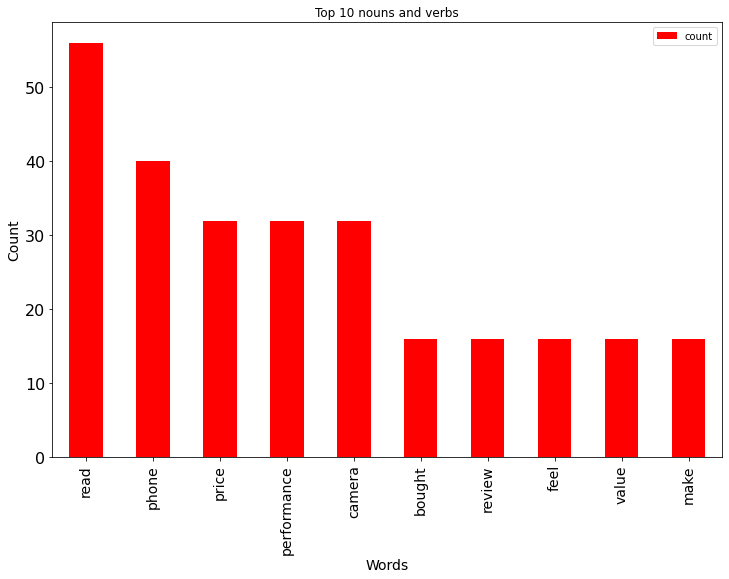

In [81]:
#Barchart for top 10 nouns & verbs
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16, color='red')
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

FEATURE EXTRACTION

In [82]:
#BOW Features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

#TF-IDF Features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

SENTIMENT ANALYSIS

In [83]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,64


In [84]:
#subjectivity and Polarity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...,"[already, using, bought, one, praise, receivin...",0.544709,0.168783
1,beast read,beast 🔥 read,"[beast, read]",0.000000,0.000000
2,best phone read,best phone read,"[best, phone, read]",0.300000,1.000000
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...,"[ui, like, cartoon, like, also, looking, oldes...",0.000000,0.000000
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...,"[upgraded, galaxy, note, liking, performance, ...",0.566667,0.606667


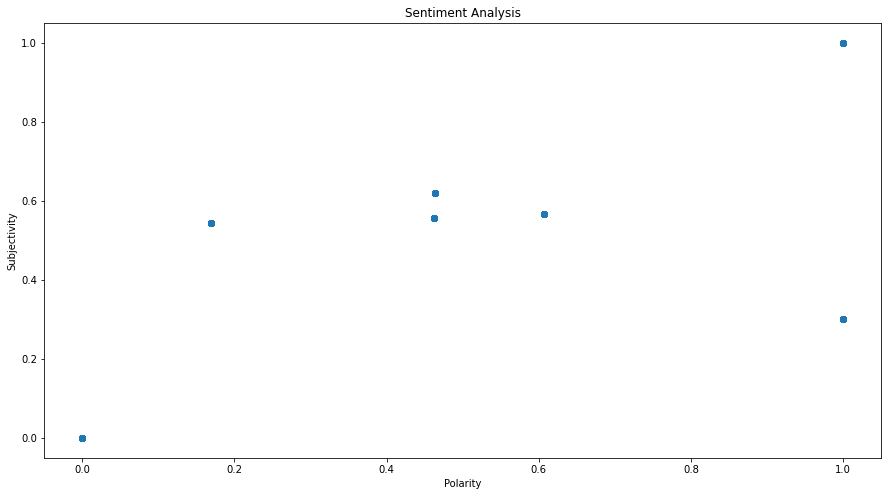

In [85]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [86]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,already using bought one praise receiving say ...,i already using s23 bought one praise receivin...,"[already, using, bought, one, praise, receivin...",0.544709,0.168783,pos
1,beast read,beast 🔥 read,"[beast, read]",0.000000,0.000000,pos
2,best phone read,best phone read,"[best, phone, read]",0.300000,1.000000,pos
3,ui like cartoon like also looking oldest ever ...,it's ui like cartoon i like also looking oldes...,"[ui, like, cartoon, like, also, looking, oldes...",0.000000,0.000000,pos
4,upgraded galaxy note liking performance camera...,upgraded galaxy note 9 i liking performance. t...,"[upgraded, galaxy, note, liking, performance, ...",0.566667,0.606667,pos


WORDCLOUD

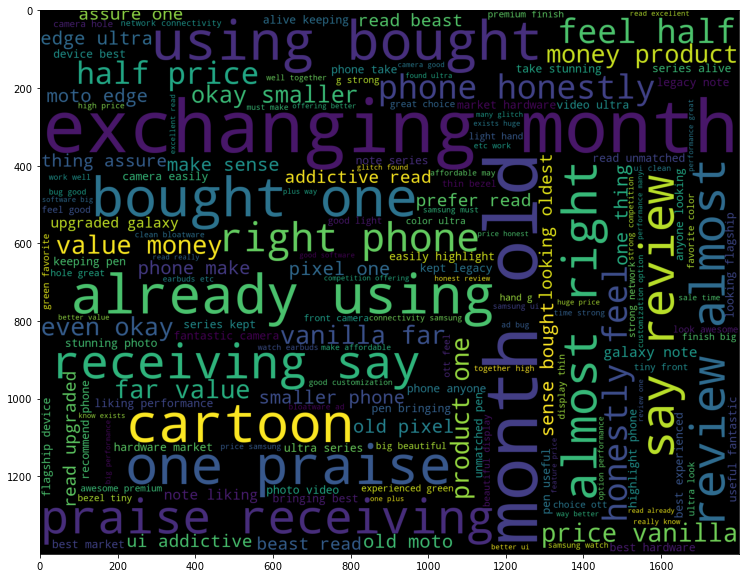

In [87]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(15,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

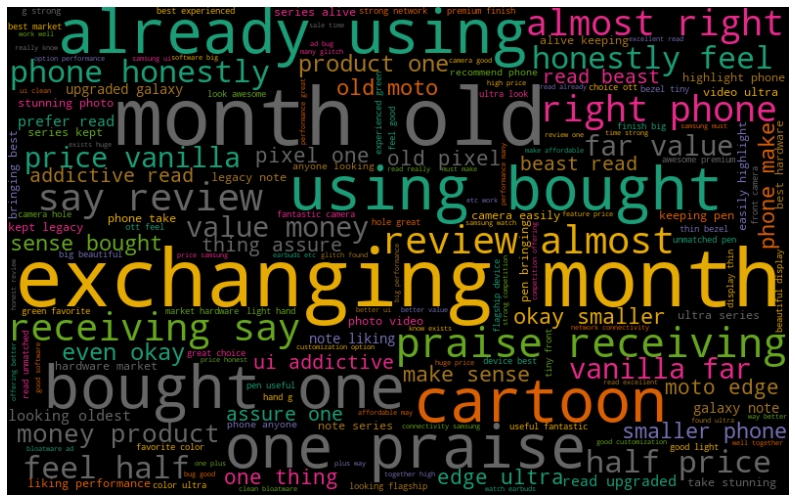

In [88]:
#Most common words in positive Review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)    

In [92]:
#Most common words in negative Review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)